In [1]:
#To analyse Wine quality
#It is a classification problem because the target column has categorical values


## import modules

In [30]:
#Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
%matplotlib inline

In [87]:
#load dataset
df = pd.read_csv('winequalityN.csv')

In [88]:
#To show the features of the data
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [89]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [90]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [91]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [93]:
#used to create iterable dataframe objects
df.items()

<generator object DataFrame.items at 0x000002B32831E6D0>

In [94]:
#to fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

## Exploratory Data Analysis

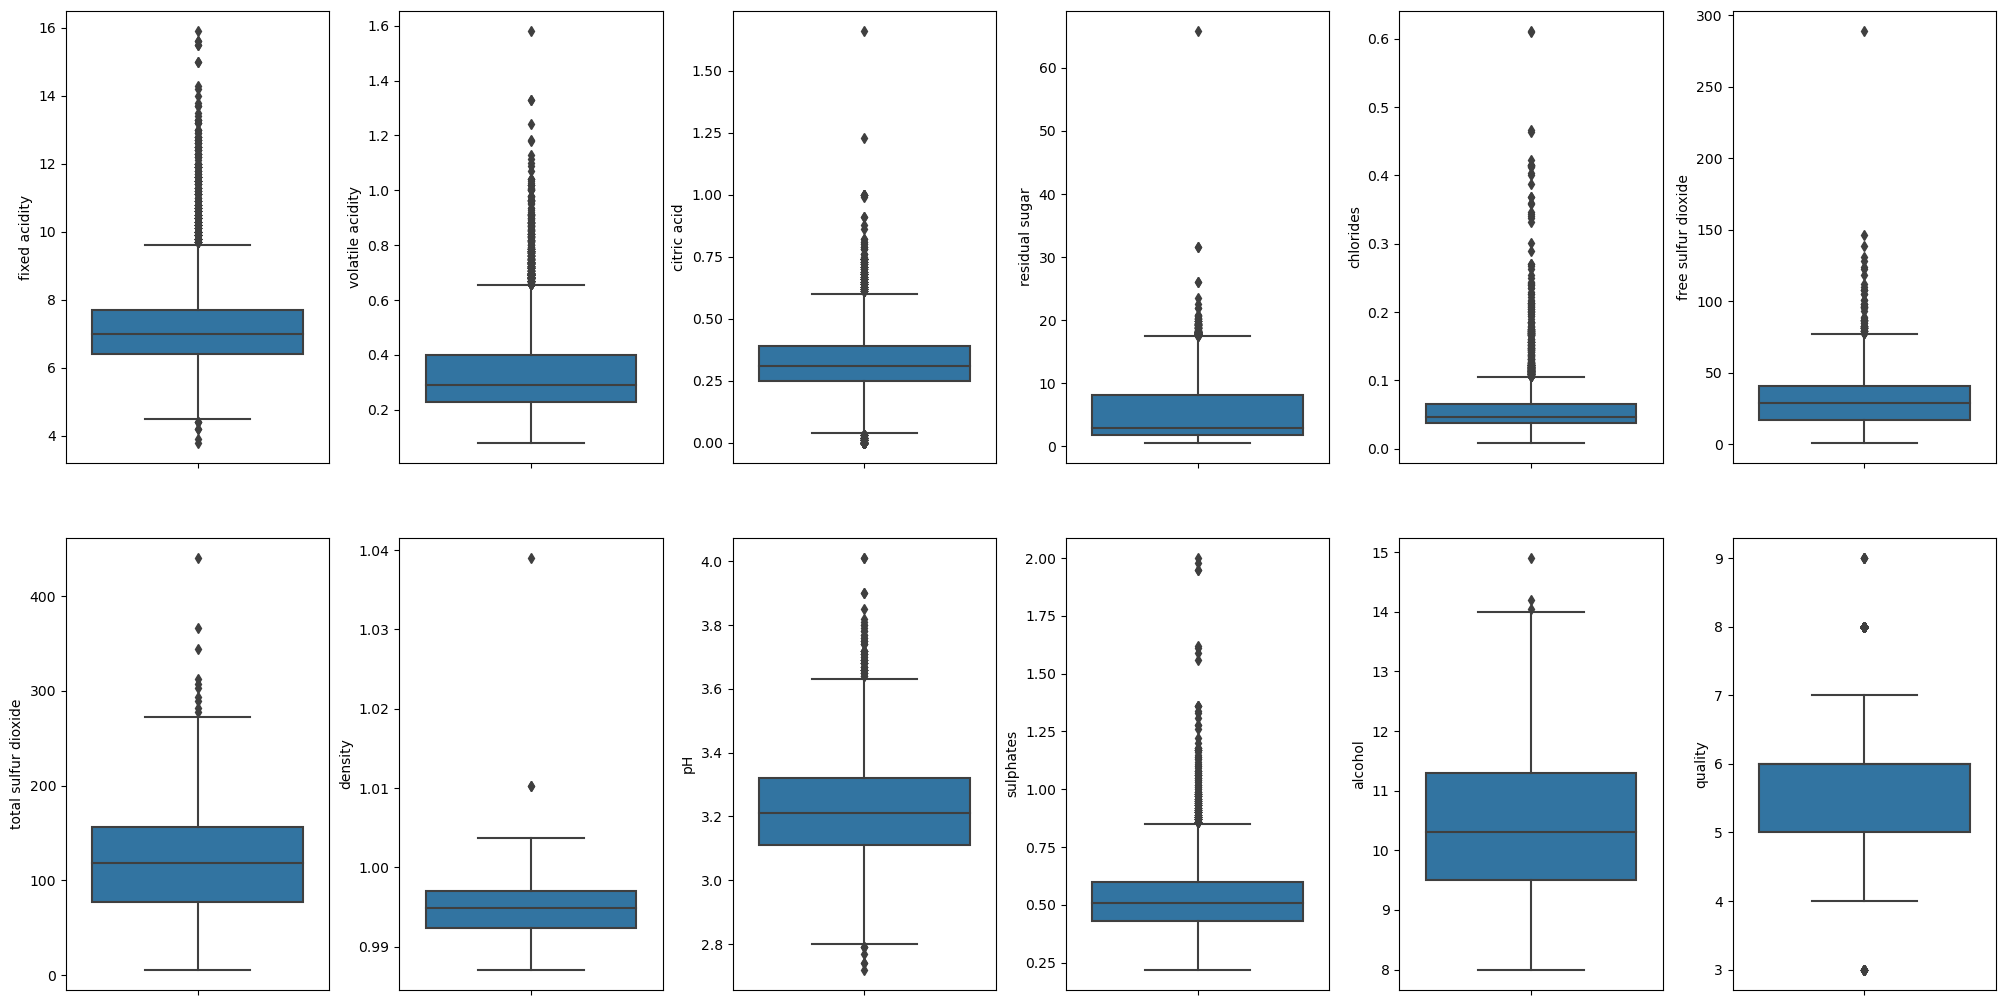

In [95]:
#to check for outliers, there are 12 columns, that is why col =6 and rows = 2
fig, ax = plt.subplots(ncols=6, nrows=2, figsize =(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data = df, ax = ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad = 5.0 )
        


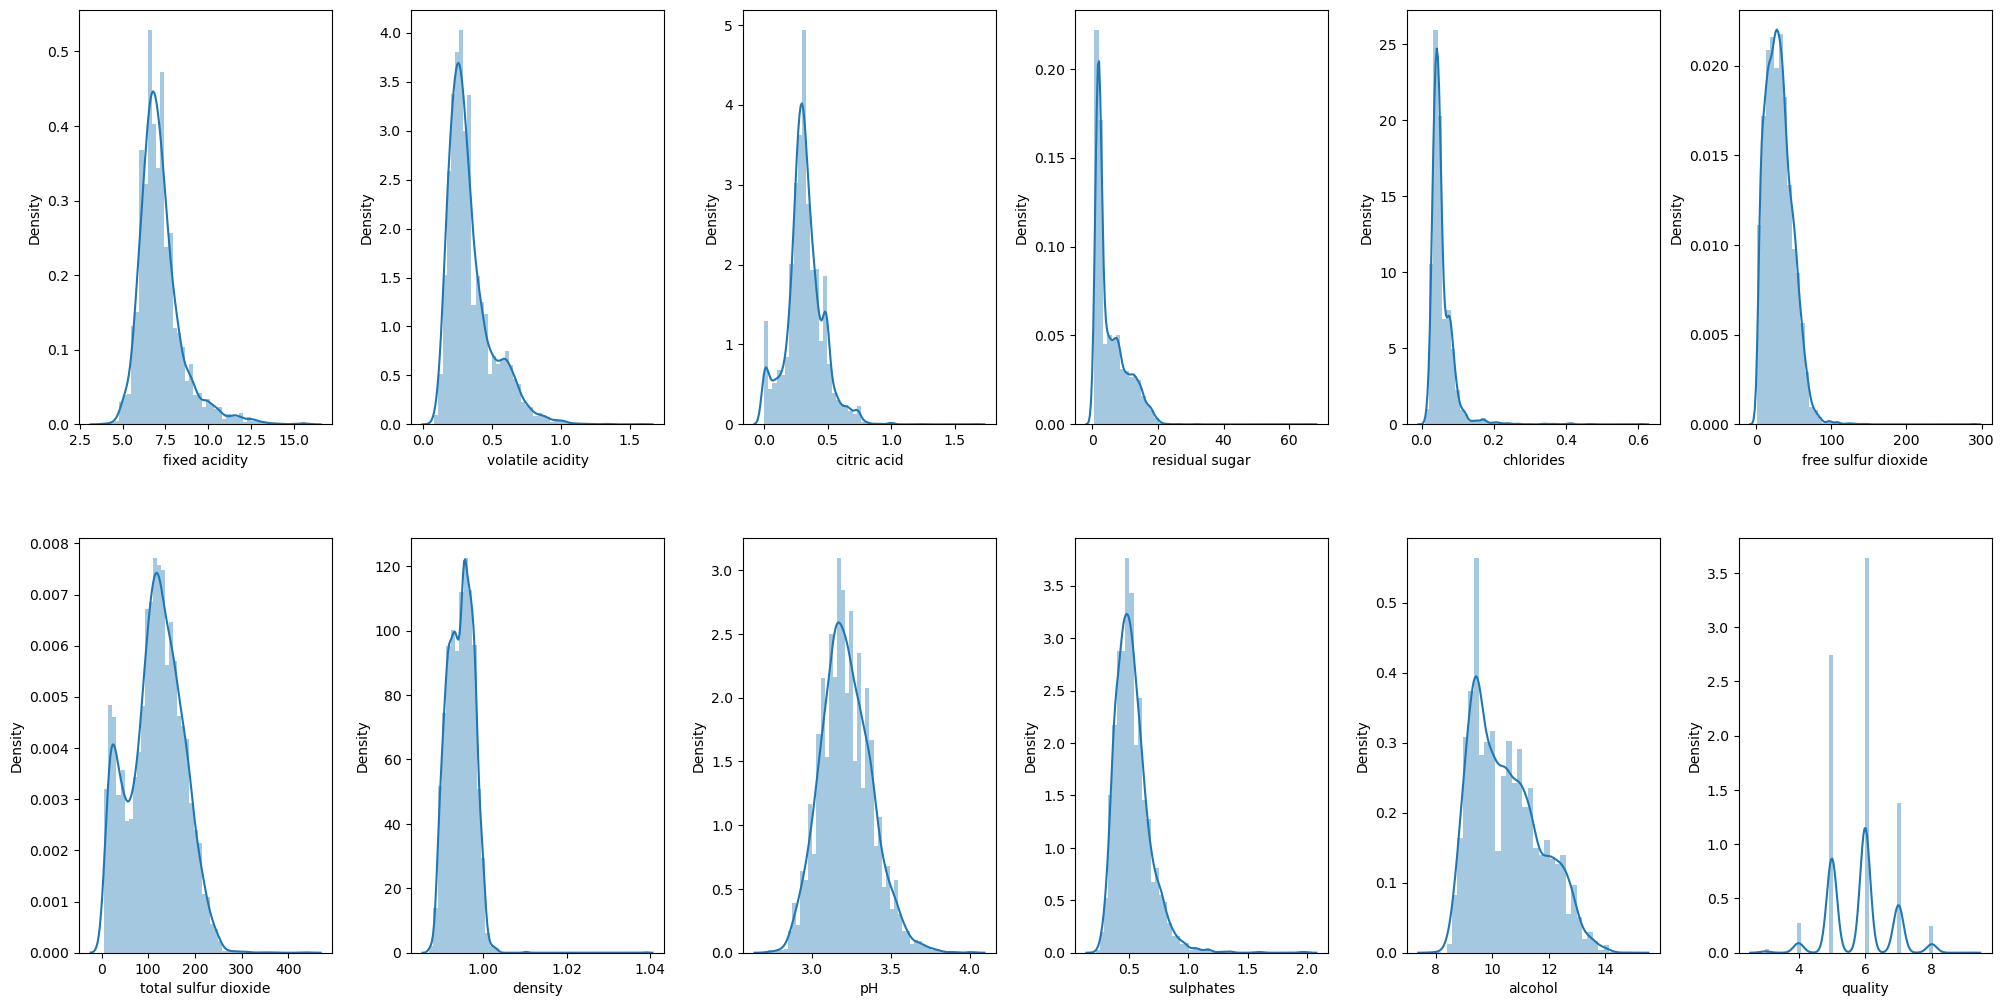

In [96]:
 #to check for outliers, there are 12 columns, that is why col =6 and rows = 2
fig, ax = plt.subplots(ncols=6, nrows=2, figsize =(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.distplot(value,  ax = ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad = 5.0 )

In [97]:
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

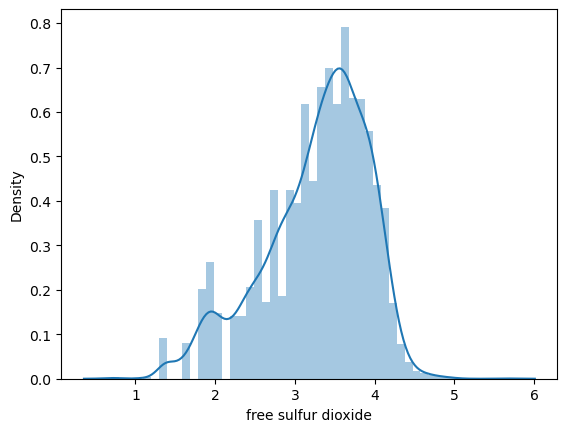

In [98]:
#distplot for sulfur dioxide
sns.distplot(df['free sulfur dioxide'])

In [99]:
df['free sulfur dioxide']

0       3.828641
1       2.708050
2       3.433987
3       3.871201
4       3.871201
          ...   
6492    3.496508
6493    3.688879
6494    3.401197
6495    3.496508
6496    2.944439
Name: free sulfur dioxide, Length: 6497, dtype: float64

In [100]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

df['type'] = le.fit_transform(df['type'])

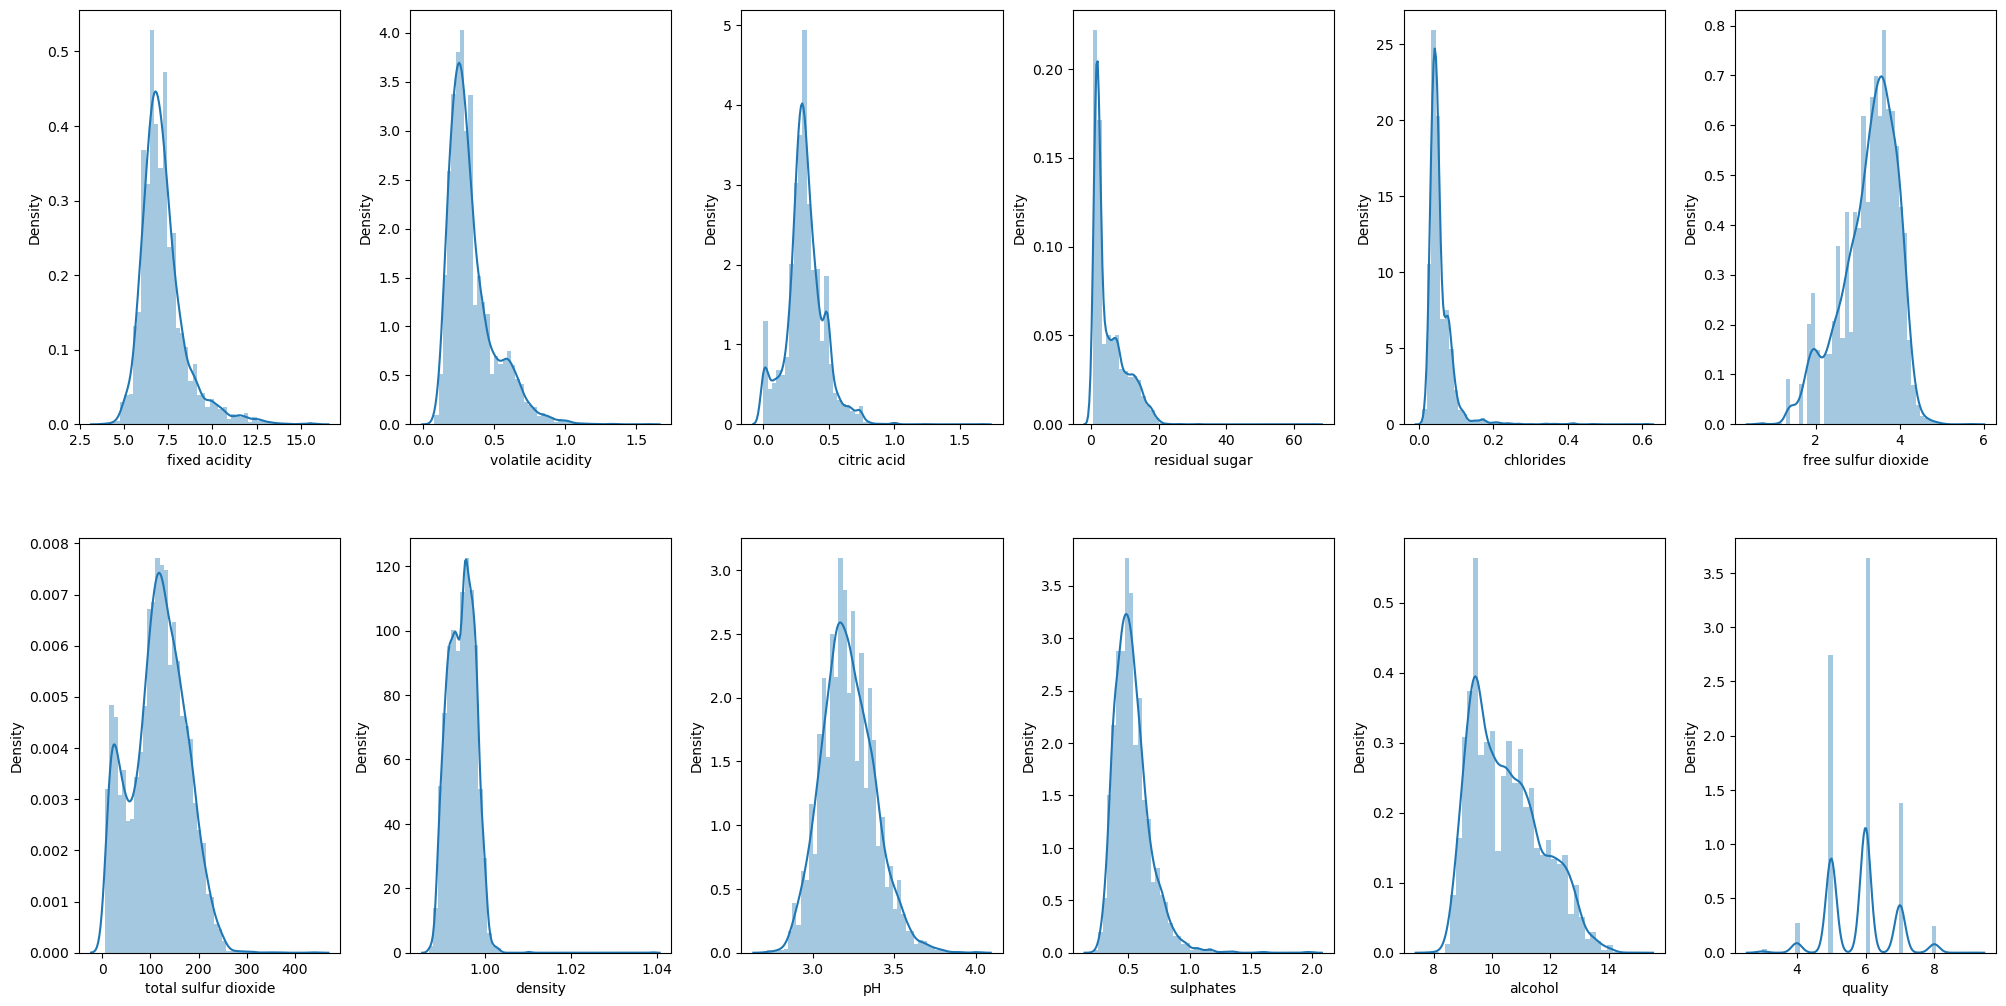

In [101]:
 #to check for outliers, there are 12 columns, that is why col =6 and rows = 2
fig, ax = plt.subplots(ncols=6, nrows=2, figsize =(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.distplot(value,  ax = ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad = 5.0 )

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

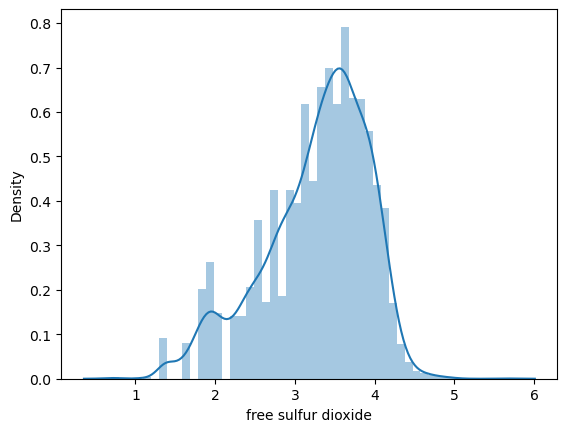

In [102]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='count'>

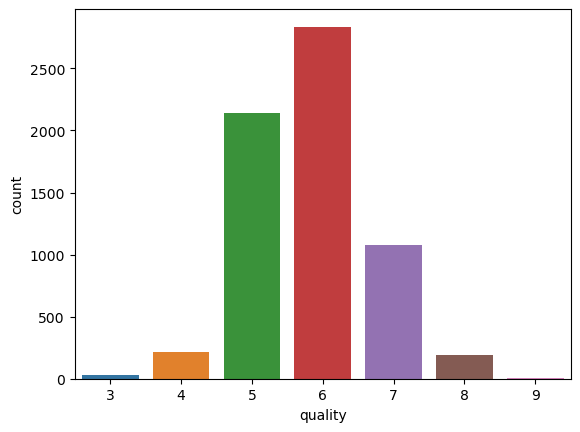

In [103]:
#The class is imbalance
sns.countplot(df['quality'])

<AxesSubplot:xlabel='type', ylabel='count'>

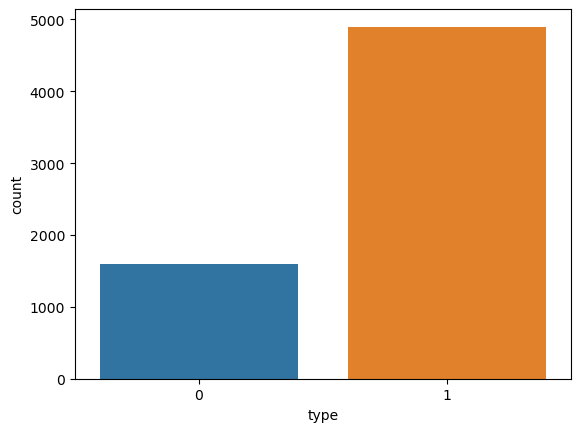

In [104]:
sns.countplot(df['type'])

<AxesSubplot:>

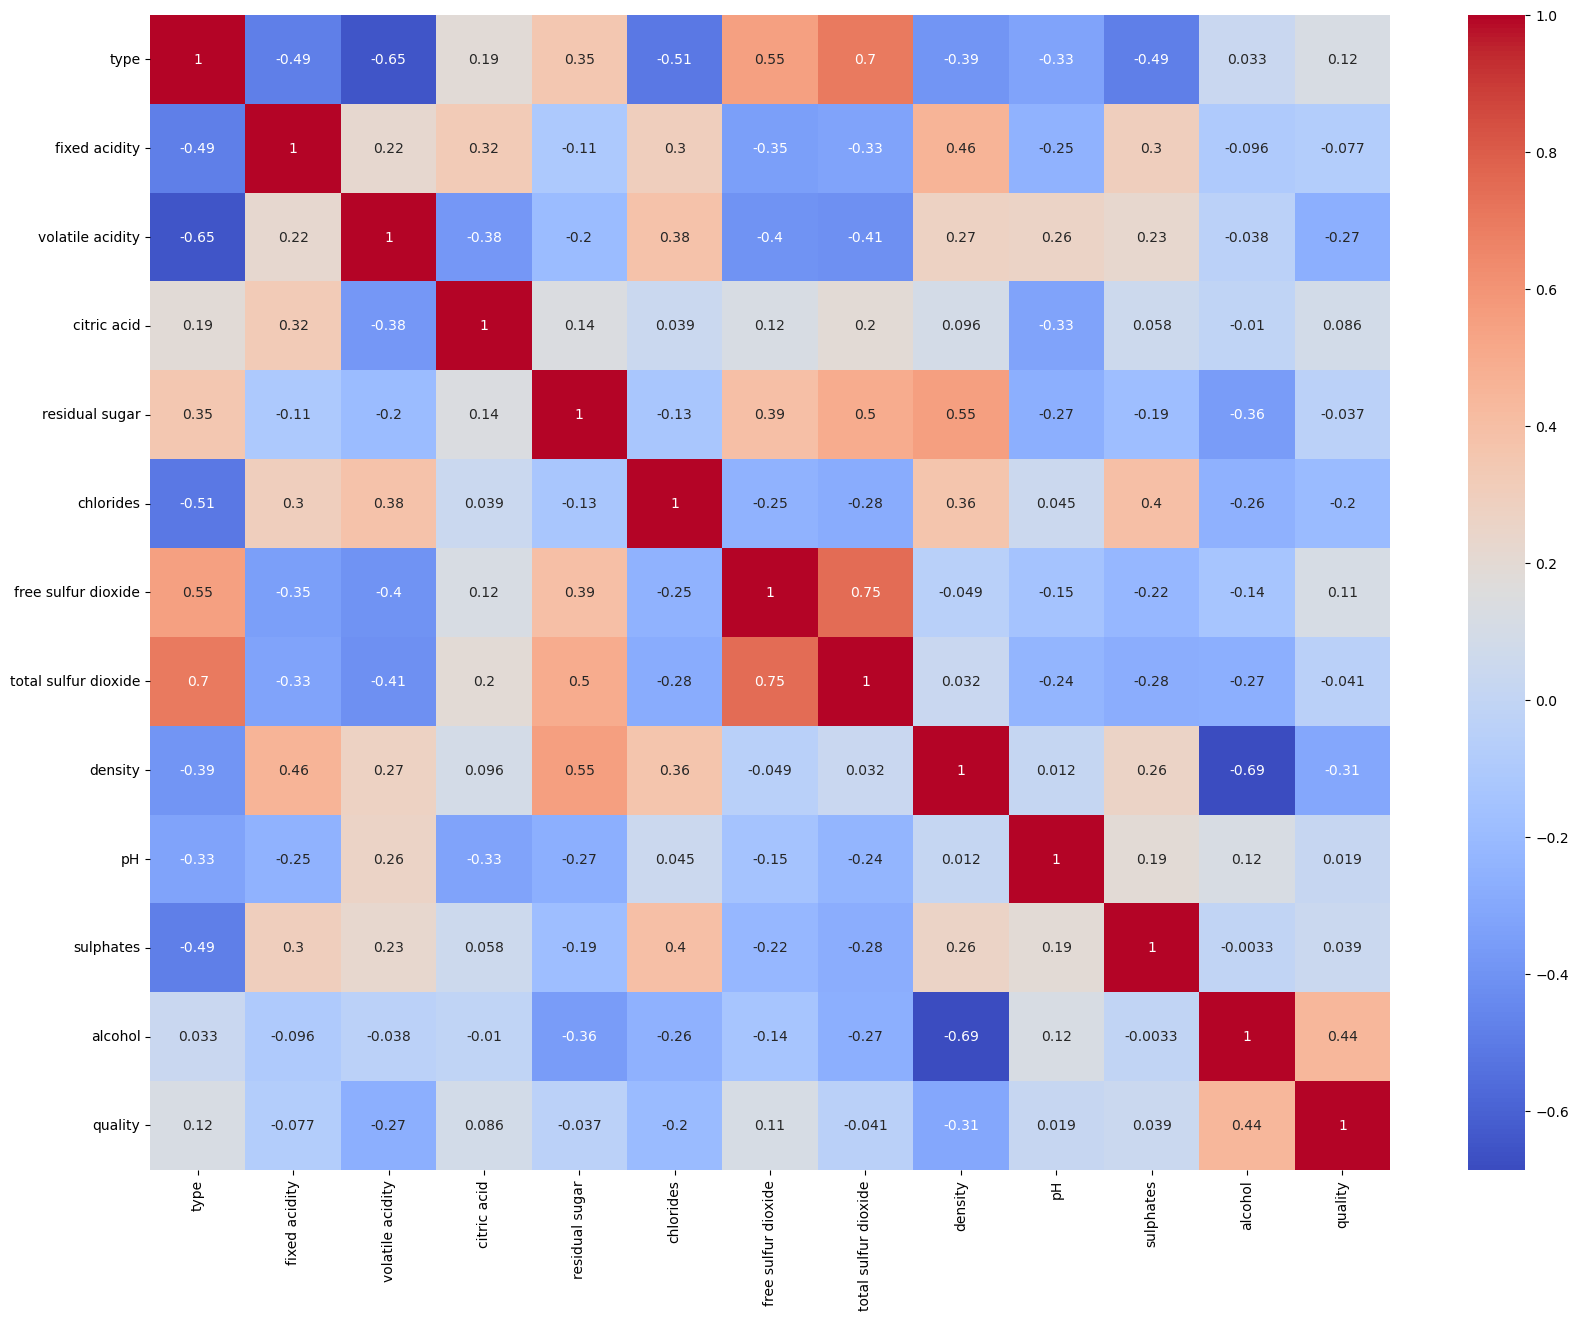

In [105]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [106]:
#input split
X = df.drop(columns = ['type', 'quality'])
y = df['quality']

In [107]:
#Class balancing 
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors = 4)

# fit predictor and target variable
X, y = smote.fit_resample(X, y)



<AxesSubplot:xlabel='quality', ylabel='count'>

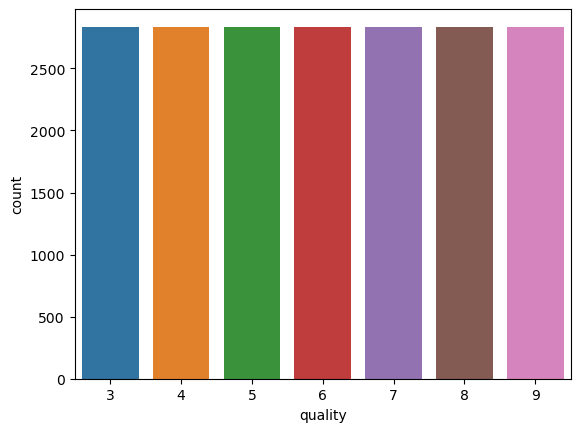

In [108]:
sns.countplot(y)

<AxesSubplot:xlabel='quality', ylabel='count'>

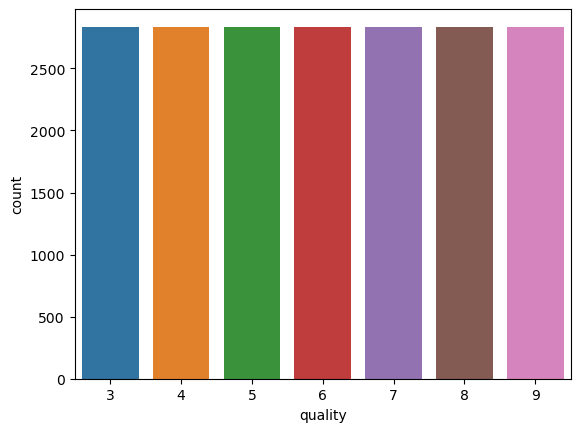

In [109]:
sns.countplot(y_smote)

In [110]:
  #Model Training
#from sklearn.model_selection import cross_val_score, train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)

In [111]:
#Model Training
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)
    #train the model
    model.fit(x_train, y_train)
    print("Accuracy: ", model.score(x_test, y_test) *100)
    #cross validation
    score = cross_val_score(model, x_train, y_train, cv=5)
    print("CV score: ",np.mean(score)*100)
    

In [112]:
#for logisticRegression
Logmodel = LogisticRegression()
classify(Logmodel, X, y)

Accuracy:  33.60870441265364
CV score:  34.193044367687534


In [113]:
from sklearn.tree import DecisionTreeClassifier
Decmodel = DecisionTreeClassifier()
classify(Decmodel, X, y)

Accuracy:  80.05238766874874
CV score:  77.54712477776226


In [114]:
#For randomforestclassifier
Ranmodel = RandomForestClassifier()
classify(Ranmodel, X, y)

Accuracy:  87.99113439451945
CV score:  86.26505920812642


In [115]:
from sklearn.ensemble import ExtraTreesClassifier
Extmodel = ExtraTreesClassifier()
classify(Extmodel, X, y)

Accuracy:  89.62321176707636
CV score:  87.44040554481606


In [116]:
import lightgbm
ligmodel = lightgbm.LGBMClassifier()
classify(ligmodel, X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 14889, number of used features: 11
[LightGBM] [Info] Start training from score -1.952987
[LightGBM] [Info] Start training from score -1.940752
[LightGBM] [Info] Start training from score -1.944970
[LightGBM] [Info] Start training from score -1.953935
[LightGBM] [Info] Start training from score -1.944501
[LightGBM] [Info] Start training from score -1.958685
[LightGBM] [Info] Start training from score -1.925896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy:  86.33890791859761
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhea

In [117]:
Extdata_prediction = Extmodel.predict(x_test)
print(Extdata_prediction)

[7 7 6 ... 5 4 5]


In [118]:
from sklearn.metrics import confusion_matrix
y_pred = Extmodel.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[  5,   0,   0,   0,   0,   0],
       [  0,  53,   0,   0,   0,   0],
       [  1,   8, 491,  22,   3,   0],
       [  0,   7,  41, 647,  35,   4],
       [  0,   1,   1,  12, 253,   2],
       [  0,   0,   0,   0,   0,  39]], dtype=int64)

<AxesSubplot:>

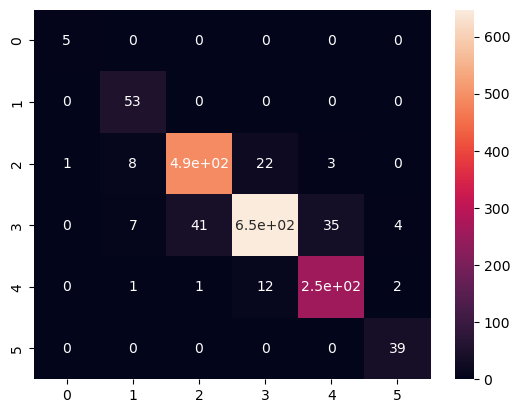

In [129]:
sns.heatmap(cm, annot=True)

In [119]:
y_test.value_counts().nunique

<bound method IndexOpsMixin.nunique of 6    734
5    525
7    269
4     53
8     39
3      5
Name: quality, dtype: int64>

In [121]:
#To Show actual value and predicted value in dataframe
view_pred = pd.DataFrame(list(zip(Extdata_prediction, y_test)))
view_pred.columns = ['Prediction', 'Actual values']
view_pred.tail(10)

,Prediction,Actual values
1615,6,6
1616,7,6
1617,6,6
1618,6,6
1619,7,7
1620,5,5
1621,6,6
1622,5,6
1623,4,4
1624,5,6


In [127]:
#To generate the precision, recall, f1-score, support
#target_names = ['Spam', 'NotSpam']
print(metrics.classification_report(y_test, Extdata_prediction))

              precision    recall  f1-score   support

           3       0.83      1.00      0.91         5
           4       0.77      1.00      0.87        53
           5       0.92      0.94      0.93       525
           6       0.95      0.88      0.91       734
           7       0.87      0.94      0.90       269
           8       0.87      1.00      0.93        39

    accuracy                           0.92      1625
   macro avg       0.87      0.96      0.91      1625
weighted avg       0.92      0.92      0.92      1625



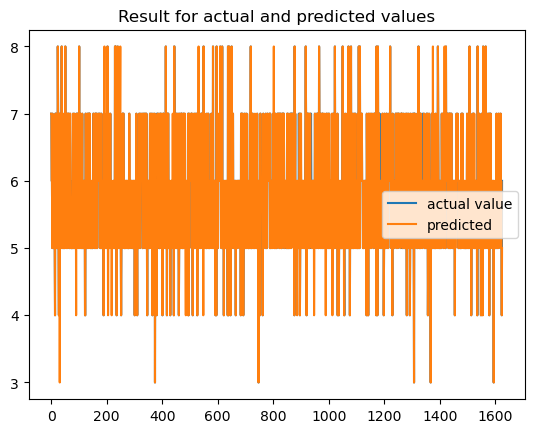

In [128]:
#Plot actual value againt the predicted value
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label = 'actual value')
plt.plot(x_ax, Extdata_prediction, label= 'predicted')
plt.title('Result for actual and predicted values')
plt.legend()
plt.show()